In [1]:
import torch as _torch
import numpy as np
import vamb4
from vamb4 import graph
import latent_visual
import matplotlib.pyplot as plt
import json
import os

## compare original and sage_nodist

In [133]:
fiverun_path = 'original/'
sagenodist_path = 'sage_nodist/graph/'
dataset_list = ['airways','gi','oral','skin','urog']
seed_list = [0,1,2,3,4]
line_number  = 5

In [161]:
def read_txt_seed(model_path, dataset,line_number):
    ncs = []
    for seed in seed_list:
        file_path = model_path+dataset+'/errorfree'
        file_name_list = os.listdir(file_path)
        for file_name in file_name_list:
            if file_name.startswith('bench_'+str(seed)):
                with open(os.path.join(file_path,file_name),'r') as f:
                    lines = f.readlines()
                    line_content = lines[line_number].split()
                    # line_content = [float(i) for i in line_content[1:]]
                    ncs.append([float(i) for i in line_content[1:]])
                    # benchs[seed] = line_content
    # return benchs
    return np.array(ncs)

In [184]:
fiverun_bench_alldata = []
sageno_bench_alldata = []
for dataset in dataset_list:
    fiverun_bench_alldata.append(read_txt_seed(fiverun_path,dataset,line_number)[:,3])
    sageno_bench_alldata.append(read_txt_seed(sagenodist_path,dataset,line_number)[0][3])

In [185]:
fiverun_bench_alldata = np.array(fiverun_bench_alldata)
fiverun_mean = fiverun_bench_alldata.mean(axis=1)
fiverun_error = [fiverun_mean-fiverun_bench_alldata.min(axis=1),fiverun_bench_alldata.max(axis=1)-fiverun_mean]

In [193]:
sageno_oral = read_txt_seed(sagenodist_path,'oral',line_number)[0]
sageno_airways = read_txt_seed(sagenodist_path,'airways',line_number)[0]

In [214]:
oral_mean

array([138.8, 117.4,  94. ,  52.8,  35. ,  10. ])

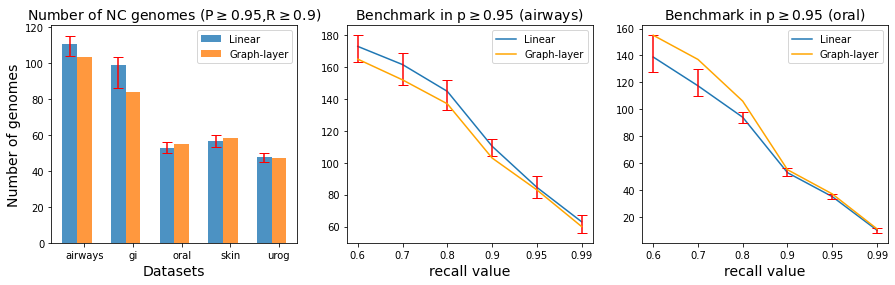

In [215]:
data_list = [fiverun_mean,sageno_bench_alldata]
name_list = ['Linear','Graph-layer']
x = np.array(range(len(dataset_list)))
width = 0.3
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)

plt.bar(x,data_list[0],tick_label = dataset_list,width=width,alpha=0.8,label = name_list[0])
plt.errorbar(x,data_list[0],yerr=fiverun_error, fmt=' ', ecolor='red', capsize=5)
plt.bar(x+width,data_list[1],tick_label = dataset_list,width=width,alpha=0.8,label = name_list[1])

plt.title(r'Number of NC genomes (P$\geq$0.95,R$\geq$0.9)',fontdict={'fontsize':14})
plt.xlabel('Datasets',fontdict={'fontsize':14})
plt.ylabel('Number of genomes',fontdict={'fontsize':14})
plt.legend()

oral_fiverun = read_txt_seed(fiverun_path,'oral',line_number)
oral_mean = oral_fiverun.mean(axis=0)
oral_error = [oral_mean-oral_fiverun.min(axis=0),oral_fiverun.max(axis=0)-oral_mean]

xlabel = ['0.6','0.7','0.8','0.9','0.95','0.99']
plt.subplot(1,3,3)
plt.plot(xlabel,oral_mean,label='Linear')
plt.errorbar(xlabel,oral_mean,yerr=oral_error, fmt=' ', ecolor='red', capsize=5)
plt.plot(xlabel,sageno_oral,color='orange',label='Graph-layer')
plt.title(r'Benchmark in p$\geq$0.95 (oral)',fontdict={'fontsize':14})
plt.xlabel('recall value',fontdict={'fontsize':14})
plt.legend()


airways_fiverun = read_txt_seed(fiverun_path,'airways',line_number)
airways_mean = airways_fiverun.mean(axis=0)
airways_error = [airways_mean-airways_fiverun.min(axis=0),airways_fiverun.max(axis=0)-airways_mean]

xlabel = ['0.6','0.7','0.8','0.9','0.95','0.99']
plt.subplot(1,3,2)
plt.plot(xlabel,airways_mean,label='Linear')
plt.errorbar(xlabel,airways_mean,yerr=airways_error, fmt=' ', ecolor='red', capsize=5)
plt.plot(xlabel,sageno_airways,color='orange',label='Graph-layer')
plt.title(r'Benchmark in p$\geq$0.95 (airways)',fontdict={'fontsize':14})
plt.xlabel('recall value',fontdict={'fontsize':14})
plt.legend()

plt.savefig('graphvamb_plot/ori_sagenodist_bench.png',dpi=300)

## different beta and gamma

In [65]:
def read_txt_gamma(model_path, dataset,date):
    benchs = {}
    file_path = model_path
    file_name_list = os.listdir(file_path)
    for file_name in file_name_list:
        if file_name.startswith('bench_' + dataset + '_' +date):
            with open(os.path.join(file_path,file_name),'r') as f:
                parts = file_name.split('_')
                value_tuple = (int(parts[-2]), float(parts[-1].rstrip('.txt')))
                # diagonal = []
                # for i, line in enumerate(f):
                #     if i == 0:
                #         continue 
                #     values = line.split() 
                #     diagonal.append(int(values[i]))
                # benchs[value_tuple] = diagonal
                lines = f.readlines()
                line_content = lines[4].split()
                line_content = [float(i) for i in line_content[1:]]
                benchs[value_tuple] = line_content
    return benchs

In [69]:
with open('errorfree/ori/bench_oral_0504.txt','r') as f:
    line_content = f.readlines()[4].split()
    bench_value_ori = [float(i) for i in line_content[1:]]

In [66]:
benchs_0507 = read_txt_gamma('errorfree/sagenew_z_neg/','oral','0507')

[174.0, 153.0, 117.0, 63.0, 37.0, 7.0]
[177.0, 153.0, 117.0, 65.0, 38.0, 9.0]
[180.0, 161.0, 123.0, 63.0, 36.0, 8.0]
[199.0, 180.0, 140.0, 66.0, 35.0, 8.0]
[173.0, 152.0, 117.0, 62.0, 37.0, 8.0]
[175.0, 157.0, 122.0, 64.0, 38.0, 8.0]
[215.0, 180.0, 134.0, 61.0, 36.0, 9.0]
[177.0, 158.0, 125.0, 65.0, 39.0, 9.0]
[179.0, 160.0, 122.0, 66.0, 43.0, 11.0]
[205.0, 171.0, 119.0, 61.0, 41.0, 14.0]


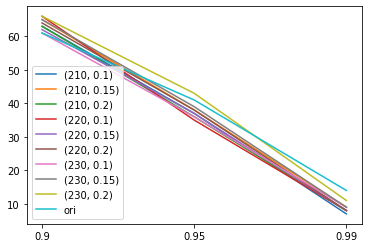

In [74]:
xlabel = ['0.6','0.7','0.8','0.9','0.95','0.99']
start = 3
for i,(value_tuple, bench_value) in enumerate(sorted(benchs_0507.items())):
    # if i in [3,4,5]:
    print(bench_value)
    plt.plot(xlabel[start:],bench_value[start:],label=value_tuple)
plt.plot(xlabel[start:],bench_value_ori[start:],label='ori')
print(bench_value_ori)
plt.legend()

### different weight

In [ ]:
def read_txt_file(file_path, line_number, start_str,end_str):
    try:
        file_name_list = os.listdir(file_path)
        benchs = {}
        for file_name in file_name_list:
            if file_name.startswith(start_str) and file_name.endswith('.txt'):
                file_full_path = os.path.join(file_path, file_name)
                file_name_without_ext = os.path.splitext(file_name)[0]
                middle_chars = file_name_without_ext.split(start_str)[1]  
                middle_chars = middle_chars.split(end_str)[0]
                with open(file_full_path, "r") as f:
                    lines = f.readlines()
                    line_content = lines[line_number - 1].split()
                    line_content = [float(i) for i in line_content[1:]]
                    benchs[middle_chars] = line_content
        return benchs
    except Exception as e:
        print(f"error in loading file: {e}")

In [3]:
file_name = 'bench_oral_0429_0.1_SAGE.txt'
start_str = 'bench_oral_0429_'
end_str = '_SAGE'
file_name_without_ext = os.path.splitext(file_name)[0]
print(file_name_without_ext)
middle_chars = file_name_without_ext.split(start_str)[1]
print(middle_chars)
middle_chars = middle_chars.split(end_str)[0]
print(middle_chars)

bench_oral_0429_0.1_SAGE
0.1_SAGE
0.1


In [ ]:
def get_benchvalue(benchs,value_idx):
    data= []
    benchs = sorted(benchs.items())
    for key, value in benchs:
        data.append(value[value_idx])
    data.append(benchs_ori['ori'][value_idx])
    return data

In [5]:
benchs_cosdistloss = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/Cosdistloss/oral',5,'bench_oral_0429_','.txt')
benchs_sage = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/GraphSage/oral',5,'bench_oral_0429_','_SAGE')
benchs_sagenewloss = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/SageNewloss/oral',5,'bench_oral_0429_','_SAGEnew')
benchs_sagenewloss_z = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/Sagenewloss_z/oral',5,'bench_oral_0429_','_SAGEnewz')
benchs_sagenewloss_neg = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/Sagenewloss_neg/oral',5,'bench_oral_0429_','_SAGE')
benchs_sagenewloss_z_neg = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/Sagenewloss_z_neg/oral',5,'bench_oral_0429_','_SAGEnew_z_neg')
benchs_ori = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/original/oral',5,'bench_oral_0429_','.txt')
benchs_cosdist_neg = read_txt_file('/Users/liuxinyuan/Desktop/master_thesis/week9/cosdist_neg/oral',5,'bench_oral_0429_','_neg')

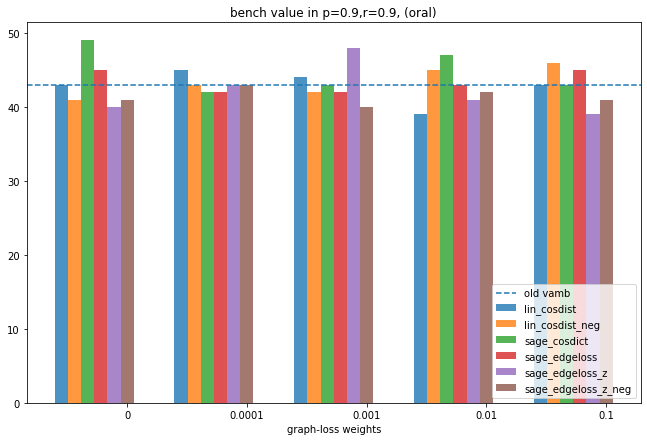

In [7]:
recall_value = 3
data_cosdistloss = get_benchvalue(benchs_cosdistloss,recall_value)
data_sage = get_benchvalue(benchs_sage,recall_value)
data_sagenewloss = get_benchvalue(benchs_sagenewloss,recall_value)
data_sagenewloss_z = get_benchvalue(benchs_sagenewloss_z,recall_value)
data_sagenewloss_neg = get_benchvalue(benchs_sagenewloss_neg,recall_value)
data_sagenewloss_z_neg = get_benchvalue(benchs_sagenewloss_z_neg,recall_value)
data_cosdist_neg = get_benchvalue(benchs_cosdist_neg,recall_value)
weights_list = ['0','0.0001','0.001','0.01','0.1']
data_list = [data_cosdistloss[:-1],data_cosdist_neg[:-1],data_sage[:-1],data_sagenewloss[:-1],data_sagenewloss_z[:-1],data_sagenewloss_z_neg[:-1]]
name_list = ['lin_cosdist','lin_cosdist_neg','sage_cosdict','sage_edgeloss','sage_edgeloss_z','sage_edgeloss_z_neg']
x = np.array(range(len(weights_list)))
width = 0.11
plt.figure(figsize=(11,7))
for i,data in enumerate(data_list):
    plt.bar(x+i*width,data_list[i],tick_label = weights_list,width=width,alpha=0.8,label = name_list[i])
plt.axhline(y=benchs_ori['ori'][recall_value],linestyle='--',label='old vamb')
plt.title('bench value in p=0.9,r=0.9, (oral)')
plt.xlabel('graph-loss weights')
plt.legend(loc = 'lower right')

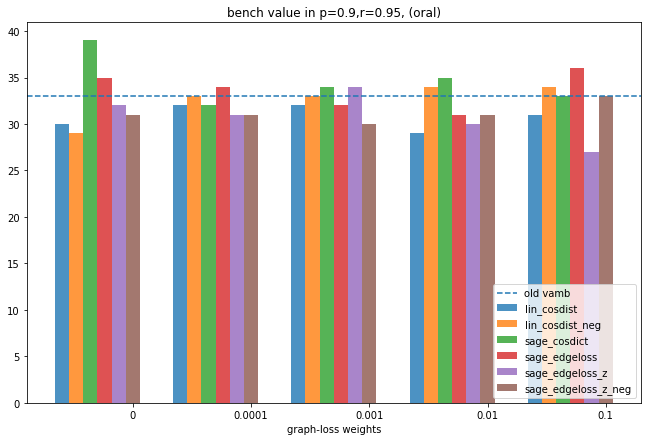

In [8]:
recall_value = 4
data_cosdistloss = get_benchvalue(benchs_cosdistloss,recall_value)
data_sage = get_benchvalue(benchs_sage,recall_value)
data_sagenewloss = get_benchvalue(benchs_sagenewloss,recall_value)
data_sagenewloss_z = get_benchvalue(benchs_sagenewloss_z,recall_value)
data_sagenewloss_neg = get_benchvalue(benchs_sagenewloss_neg,recall_value)
data_sagenewloss_z_neg = get_benchvalue(benchs_sagenewloss_z_neg,recall_value)
data_cosdist_neg = get_benchvalue(benchs_cosdist_neg,recall_value)
weights_list = ['0','0.0001','0.001','0.01','0.1']
data_list = [data_cosdistloss[:-1],data_cosdist_neg[:-1],data_sage[:-1],data_sagenewloss[:-1],data_sagenewloss_z[:-1],data_sagenewloss_z_neg[:-1]]
name_list = ['lin_cosdist','lin_cosdist_neg','sage_cosdict','sage_edgeloss','sage_edgeloss_z','sage_edgeloss_z_neg']
x = np.array(range(len(weights_list)))
width = 0.12
plt.figure(figsize=(11,7))
for i,data in enumerate(data_list):
    plt.bar(x+i*width,data_list[i],tick_label = weights_list,width=width,alpha=0.8,label = name_list[i])
plt.axhline(y=benchs_ori['ori'][recall_value],linestyle='--',label='old vamb')
plt.title('bench value in p=0.9,r=0.95, (oral)')
plt.xlabel('graph-loss weights')
plt.legend(loc = 'lower right')


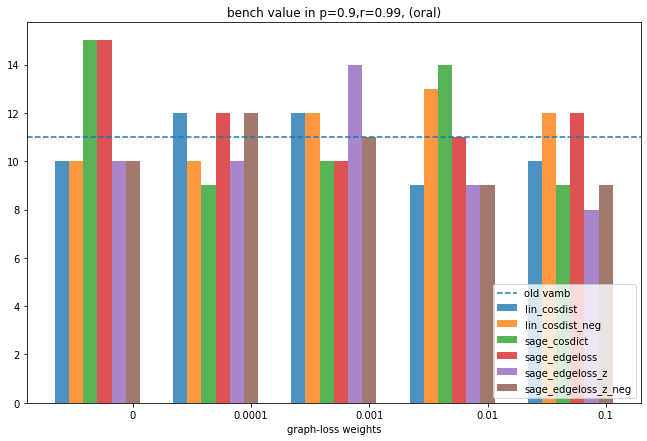

In [9]:
recall_value = 5
data_cosdistloss = get_benchvalue(benchs_cosdistloss,recall_value)
data_sage = get_benchvalue(benchs_sage,recall_value)
data_sagenewloss = get_benchvalue(benchs_sagenewloss,recall_value)
data_sagenewloss_z = get_benchvalue(benchs_sagenewloss_z,recall_value)
data_sagenewloss_neg = get_benchvalue(benchs_sagenewloss_neg,recall_value)
data_sagenewloss_z_neg = get_benchvalue(benchs_sagenewloss_z_neg,recall_value)
data_cosdist_neg = get_benchvalue(benchs_cosdist_neg,recall_value)
weights_list = ['0','0.0001','0.001','0.01','0.1']
data_list = [data_cosdistloss[:-1],data_cosdist_neg[:-1],data_sage[:-1],data_sagenewloss[:-1],data_sagenewloss_z[:-1],data_sagenewloss_z_neg[:-1]]
name_list = ['lin_cosdist','lin_cosdist_neg','sage_cosdict','sage_edgeloss','sage_edgeloss_z','sage_edgeloss_z_neg']
x = np.array(range(len(weights_list)))
width = 0.12
plt.figure(figsize=(11,7))
for i,data in enumerate(data_list):
    plt.bar(x+i*width,data_list[i],tick_label = weights_list,width=width,alpha=0.8,label = name_list[i])
plt.axhline(y=benchs_ori['ori'][recall_value],linestyle='--',label='old vamb')
plt.title('bench value in p=0.9,r=0.99, (oral)')
plt.xlabel('graph-loss weights')
plt.legend(loc = 'lower right')

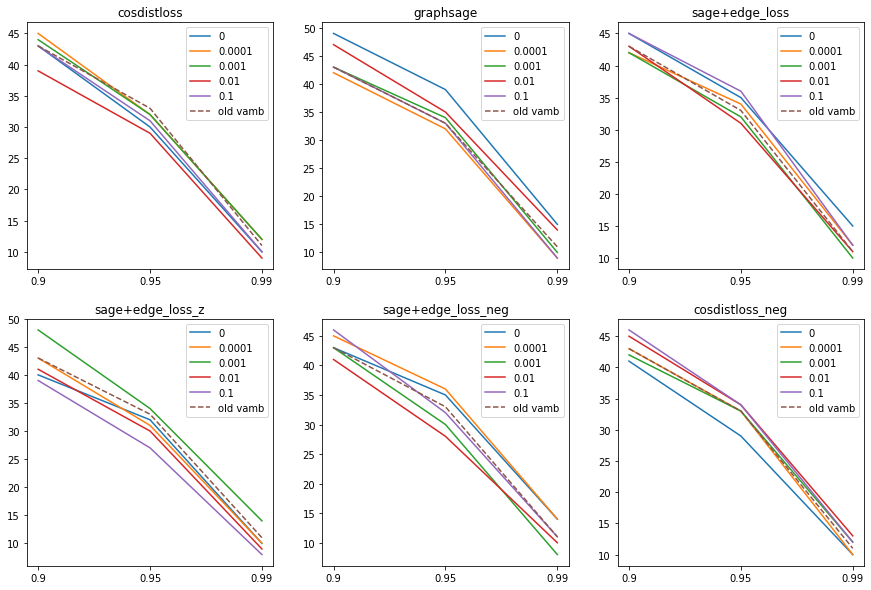

In [10]:
x = ['0.6','0.7','0.8','0.9','0.95','0.99']
weights_list = ['0','0.0001','0.001','0.01','0.1']
def bench_plot(benchs,name):
    for weight in weights_list:
        plt.plot(x[3:],benchs[weight][3:],label = str(weight))
    plt.plot(x[3:],list(benchs_ori.values())[0][3:],linestyle = '--',label = 'old vamb')
    plt.legend()
    plt.title(name)

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
bench_plot(benchs_cosdistloss,'cosdistloss')
plt.subplot(2,3,2)
bench_plot(benchs_sage,'graphsage')
plt.subplot(2,3,3)
bench_plot(benchs_sagenewloss,'sage+edge_loss')
plt.subplot(2,3,4)
bench_plot(benchs_sagenewloss_z,'sage+edge_loss_z')
plt.subplot(2,3,5)
bench_plot(benchs_sagenewloss_neg,'sage+edge_loss_neg')
plt.subplot(2,3,6)
bench_plot(benchs_cosdist_neg,'cosdistloss_neg')



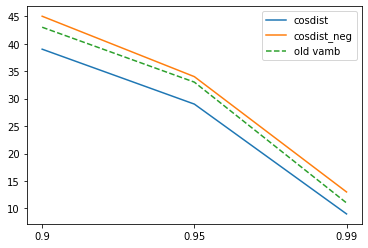

In [11]:
plt.plot(x[3:],benchs_cosdistloss['0.01'][3:],label = 'cosdist')
plt.plot(x[3:],benchs_cosdist_neg['0.01'][3:],label = 'cosdist_neg')
plt.plot(x[3:],benchs_ori['ori'][3:],linestyle = '--',label = 'old vamb')
plt.legend()

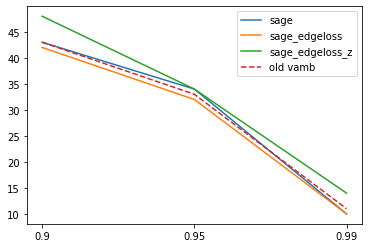

In [12]:
plt.plot(x[3:],benchs_sage['0.001'][3:],label = 'sage')
plt.plot(x[3:],benchs_sagenewloss['0.001'][3:],label = 'sage_edgeloss')
plt.plot(x[3:],benchs_sagenewloss_z['0.001'][3:],label = 'sage_edgeloss_z')
plt.plot(x[3:],benchs_ori['ori'][3:],linestyle = '--',label = 'old vamb')
plt.legend()